<a href="https://colab.research.google.com/github/cuaide/test_capstone/blob/main/Detection_trafficlight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
import glob
from IPython.display import Image,display

In [ ]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 14.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
import ultralytics

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 235MB/s]


In [ ]:
ultralytics.checks( )

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/rpl-992-_jpg.rf.dfb50f0c505246e73b9aa21970a50b63.jpg' save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 445, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 235, in predict
    self.predictor.setup_model(model=self.model, verbose=is_cli)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 311, in setup_model
    self.model = AutoBackend(model or self.args.model,
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/autobackend.py", line 115, in __init__
    model = model.fuse(verbose=verbose) if fuse else mod

/content


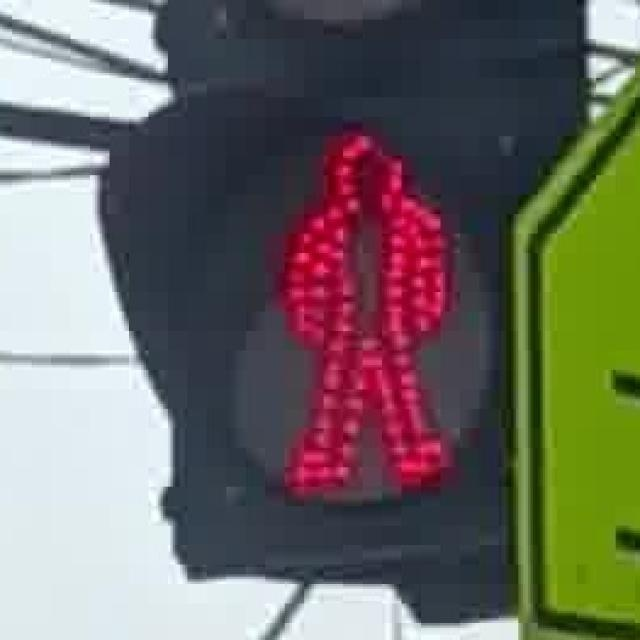

In [ ]:
%cd{HOME}

In [ ]:
model = YOLO(f'{HOME}/yolov8s.pt')
results = model.predict(source='/content/runs/detect/predict2/rpl-992-_jpg.rf.dfb50f0c505246e73b9aa21970a50b63.jpg', conf=0.25)


image 1/1 /content/runs/detect/predict2/rpl-992-_jpg.rf.dfb50f0c505246e73b9aa21970a50b63.jpg: 640x640 (no detections), 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Z5SQgSHfjLTZXZr4QERy")
project = rf.workspace("dkdkd").project("cap-for-detection")
version = project.version(2)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO

Dataset downloaded to: /content/datasets/cap-for-detection-2


In [ ]:
data_yaml_path = os.path.join(dataset.location, "data.yaml")

In [ ]:
print("data.yaml is located at:", data_yaml_path)

data.yaml is located at: /content/datasets/cap-for-detection-2/data.yaml


In [ ]:
dataset.location

'/content/datasets/cap-for-detection-2'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/cap-for-detection-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visual

In [ ]:
!ls {HOME}/runs/detect/train7/

args.yaml					     R_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	 val_batch0_pred.jpg
confusion_matrix.png				     results.png	 val_batch1_labels.jpg
events.out.tfevents.1714978825.83059ffcb172.20736.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					     train_batch960.jpg  weights
P_curve.png					     train_batch961.jpg
PR_curve.png					     train_batch962.jpg


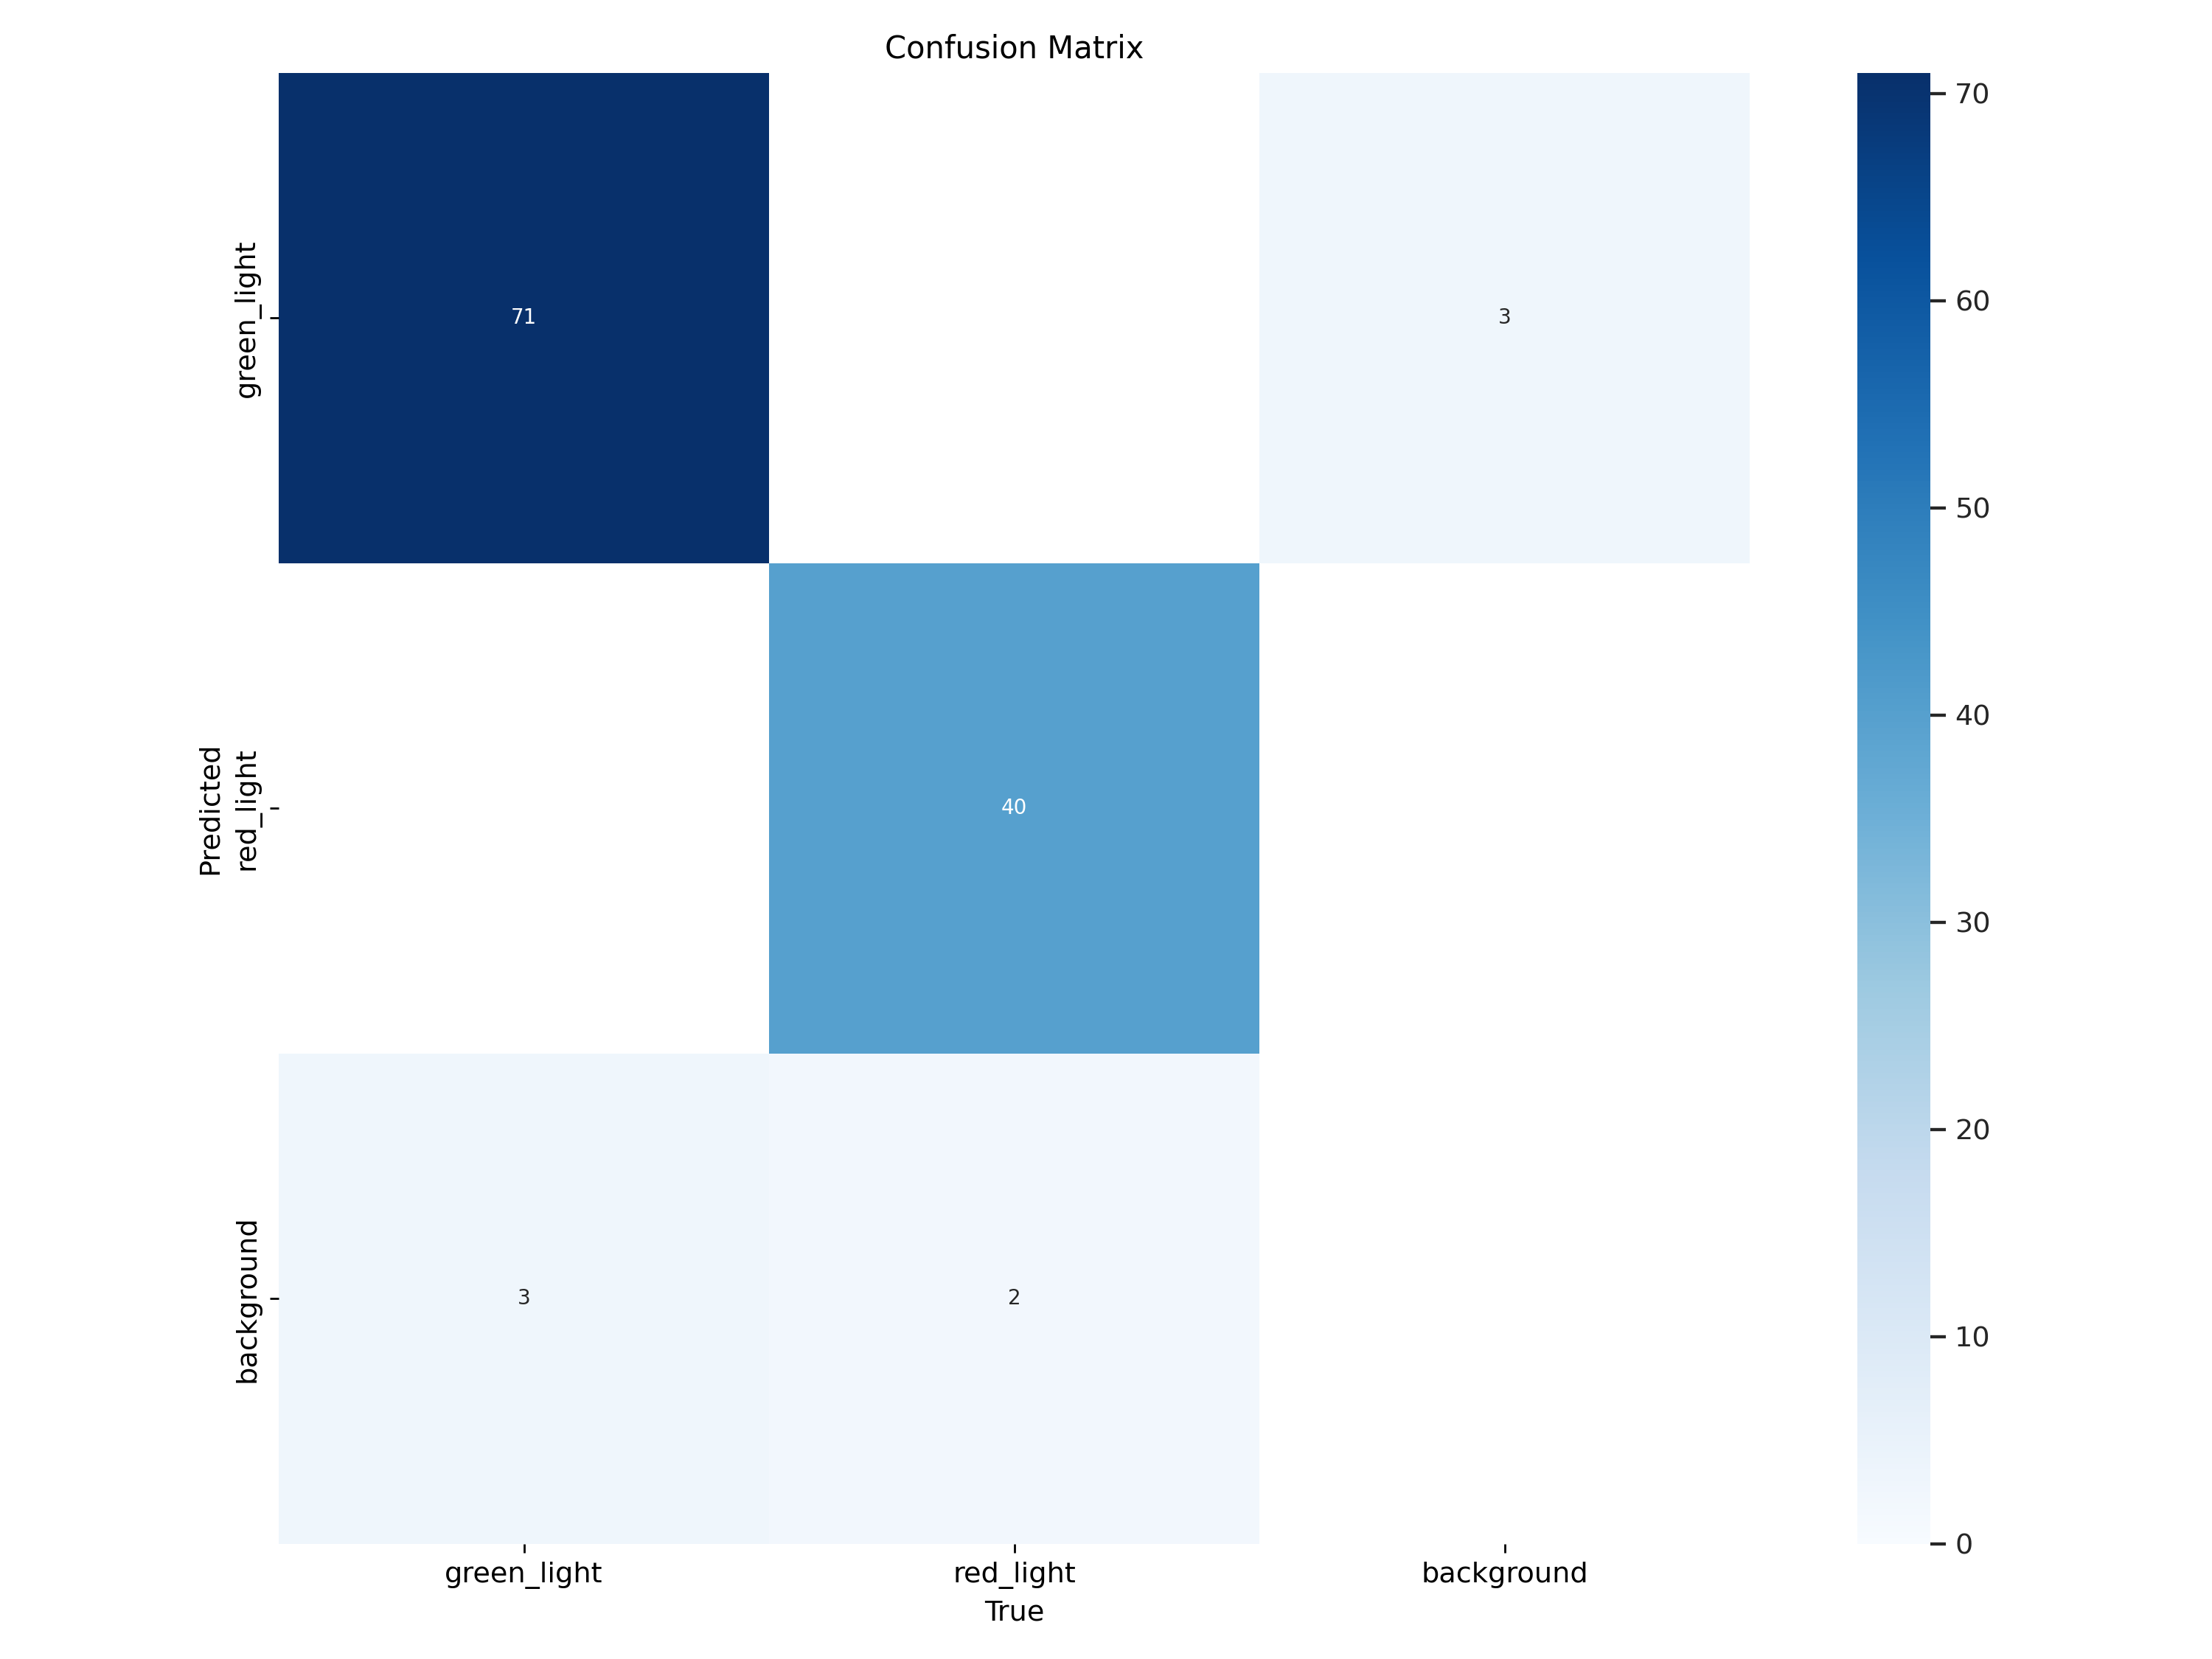

In [ ]:
Image(filename=f"{HOME}/runs/detect/train7/confusion_matrix.png")

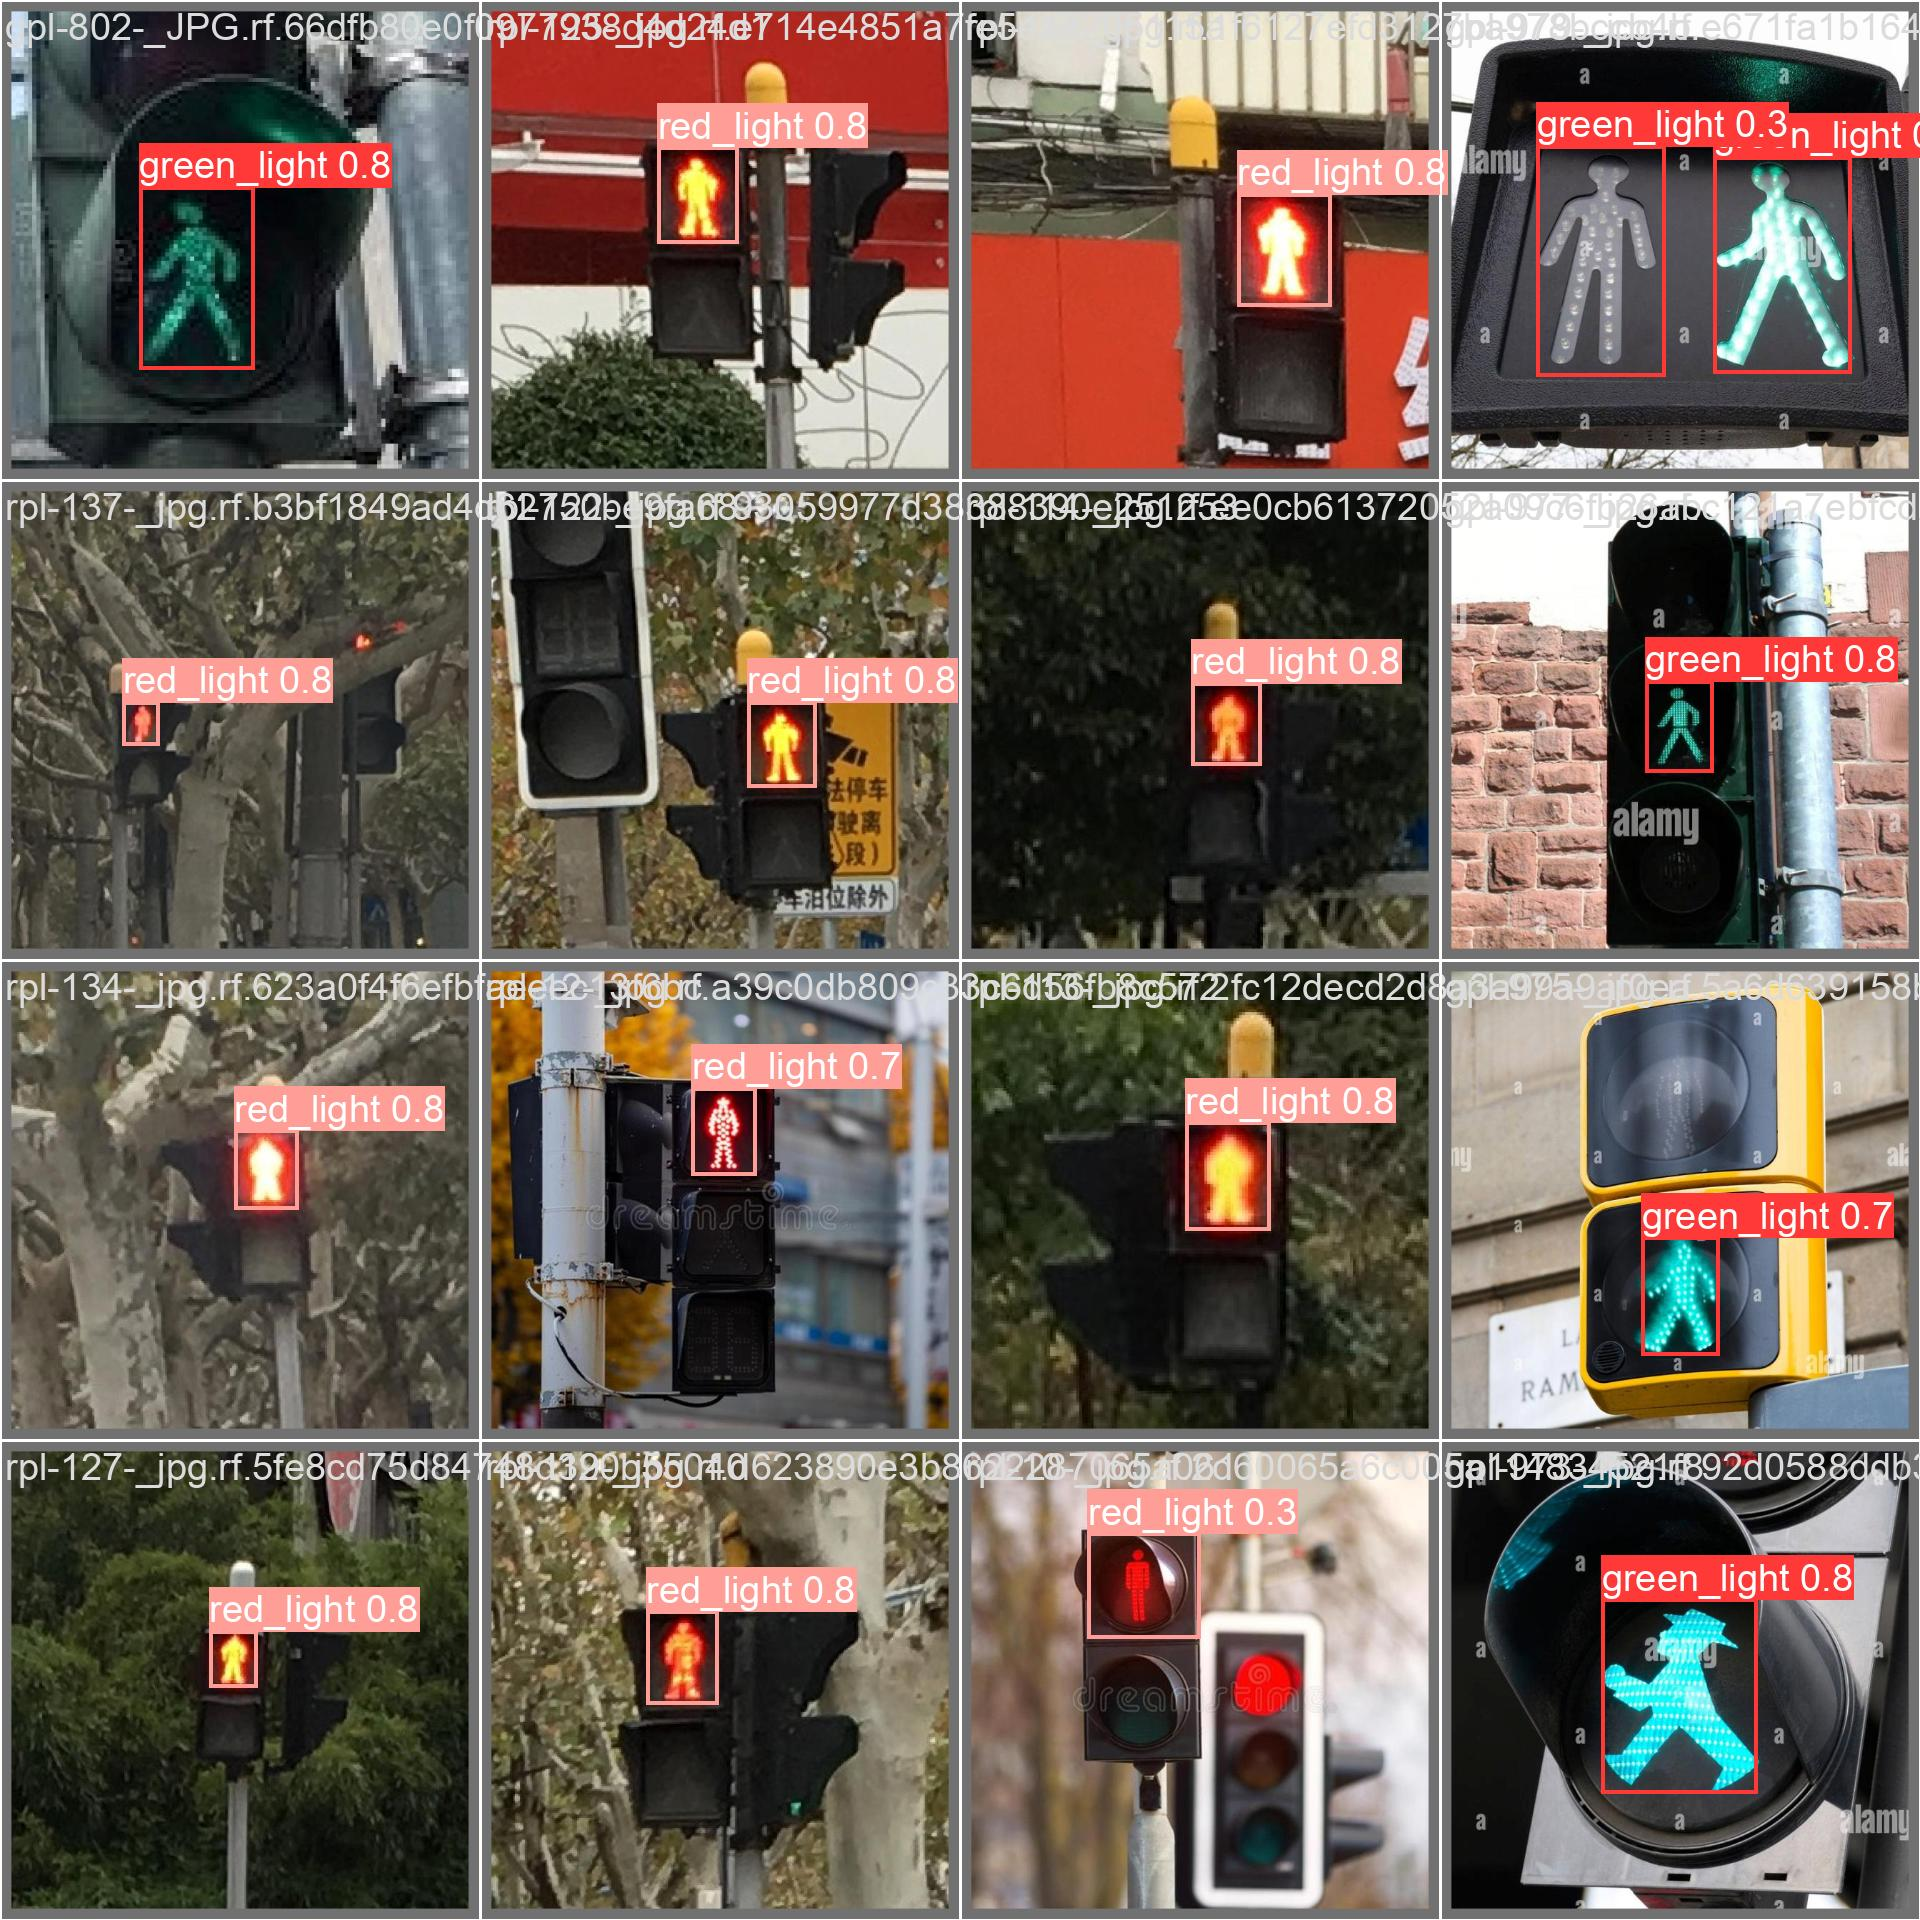

In [ ]:
Image(filename = f"{HOME}/runs/detect/train7/val_batch0_pred.jpg",height=1000)

/content


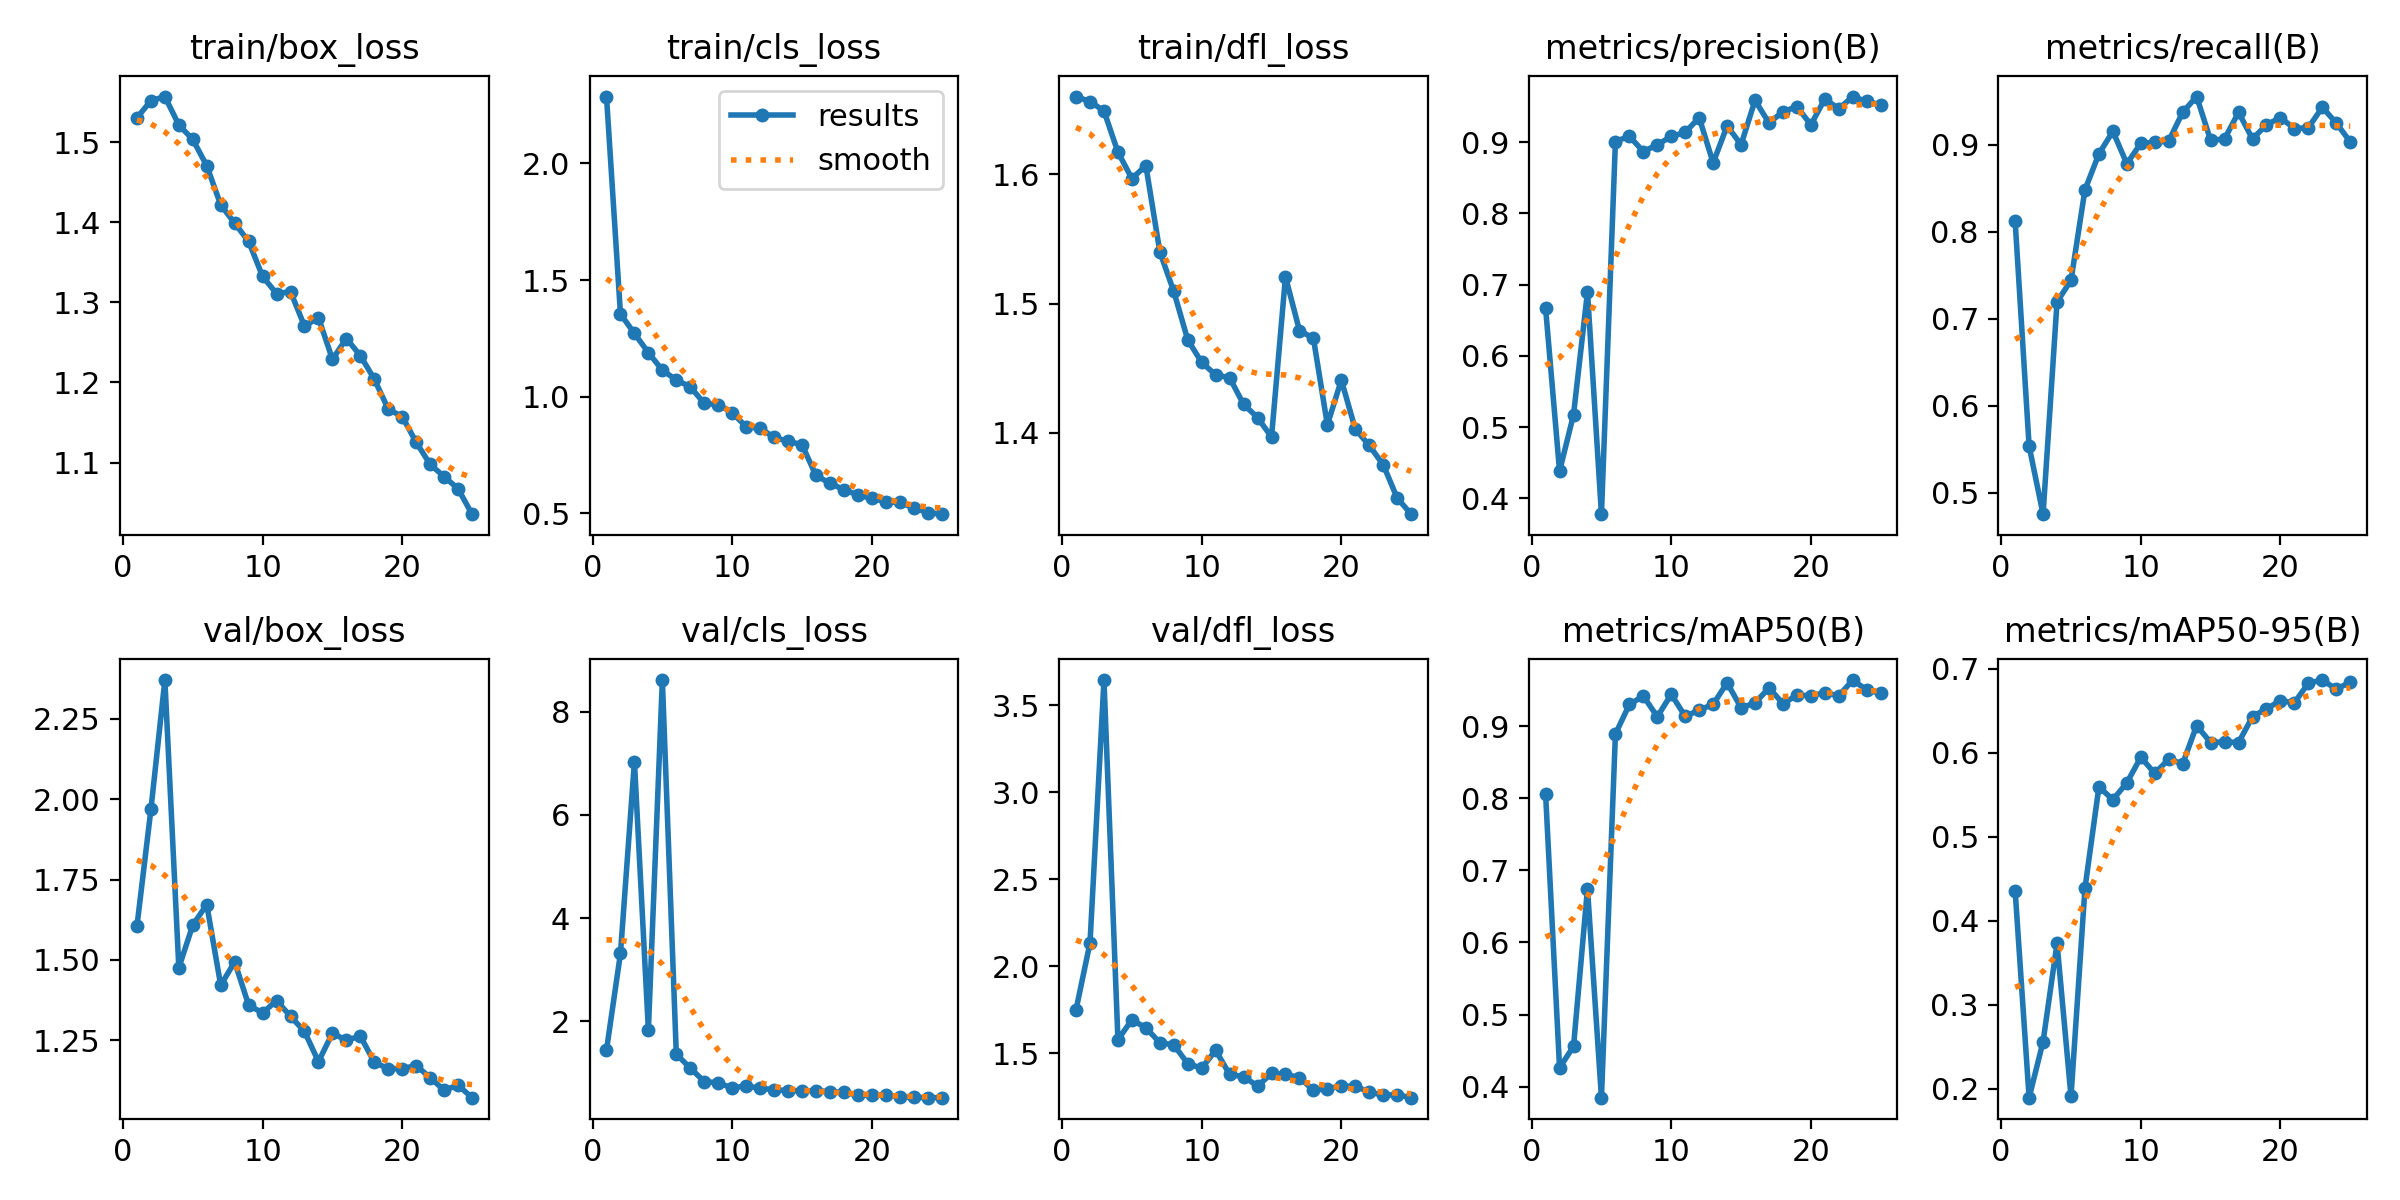

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/results.png',width=1000)

In [ ]:
%cd {HOME}

/content


In [ ]:
data_yaml_path = os.path.join(dataset.location, "data.yaml")

In [ ]:
f'{HOME}runs/detect/train7/best.pt'

'/contentruns/detect/train7/best.pt'

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train7/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/cap-for-detection-2/valid/labels.cache... 116 images, 0 backgrounds, 0 corrupt: 100% 116/116 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.83it/s]
                   all        116        116      0.964      0.943      0.964      0.684
           green_light        116         74      0.959      0.957      0.945       0.67
             red_light        116         42      0.969      0.929      0.983      0.699
Speed: 2.8ms preprocess, 13.0ms inference, 0.0ms loss, 6.3ms postp

In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train7/weights/best.pt' conf =0.25 source='/content/IMG_3484.jpg'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/IMG_3484.jpg: 640x480 1 red_light, 74.6ms
Speed: 4.2ms preprocess, 74.6ms inference, 720.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train7/")

View the status of your deployment at: https://app.roboflow.com/dkdkd/cap-for-detection/2
Share your model with the world at: https://universe.roboflow.com/dkdkd/cap-for-detection/model/2


In [ ]:

model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on gpl-801-_JPG.rf.c3e99f126baeb5b76af06c631643d08e.jpg


{'predictions': [{'x': 298.0,
   'y': 287.0,
   'width': 214.0,
   'height': 332.0,
   'confidence': 0.8310657739639282,
   'class': 'green_light',
   'class_id': 0,
   'detection_id': '42a1a2d9-5fdc-40db-a346-b2b7c73cd065',
   'image_path': '/content/datasets/cap-for-detection-2/test/images/gpl-801-_JPG.rf.c3e99f126baeb5b76af06c631643d08e.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

In [ ]:
!pip install object_detection
!pip install detection_utils

In [ ]:
!pip install inference

In [ ]:
import requests

workspace_id = "Dkdkd"
model_id = "cap-for-detection/2"
image_path="/content/IMG_3484.jpg"
confidence = 0.75
api_key = "Z5SQgSHfjLTZXZr4QERy"

infer_object_detection_payload = {
    "image": {
        "type": "jpg",
        "value": image_path,
    },
    "confidence": 0.25,
    "iou_threshold": 0.5,
    "api_key": "Z5SQgSHfjLTZXZr4QERy",
}
res = requests.post(
    f"http://localhost:9001/{'Dkdkd'}/{'cap-for-detection/2'}",
    json=infer_object_detection_payload
)

predictions = res.json()

ConnectionError: HTTPConnectionPool(host='localhost', port=9001): Max retries exceeded with url: /Dkdkd/cap-for-detection/2 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7b79feed1600>: Failed to establish a new connection: [Errno 111] Connection refused'))